In [1]:
import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Data Cleaning Listings/FINAL_TRAIN_DATA_NY.csv'
#read data, and quickly check if it is correctly read in
train_data_ny= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Data Cleaning Listings/FINAL_VALID_DATA_NY.csv'
#read data, and quickly check if it is correctly read in
valid_data_ny= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Data Cleaning Listings/FINAL_TEST_DATA_NY.csv'
#read data, and quickly check if it is correctly read in
test_data_ny= pd.read_csv(file_path)

### Feature engineering

In [2]:
train_data_ny.info()
valid_data_ny.info()
test_data_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273397 entries, 0 to 1273396
Columns: 138 entries, id to kitchen_amenities
dtypes: bool(107), float64(10), int64(20), object(1)
memory usage: 431.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136059 entries, 0 to 136058
Columns: 138 entries, id to kitchen_amenities
dtypes: bool(107), float64(10), int64(20), object(1)
memory usage: 46.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137062 entries, 0 to 137061
Columns: 138 entries, id to kitchen_amenities
dtypes: bool(107), float64(10), int64(20), object(1)
memory usage: 46.4+ MB


In [3]:
import pandas as pd

# Concatenate the datasets
combined_data = pd.concat([train_data_ny, valid_data_ny, test_data_ny], ignore_index=True)

# Display information about the combined dataset
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546518 entries, 0 to 1546517
Columns: 138 entries, id to kitchen_amenities
dtypes: bool(107), float64(10), int64(20), object(1)
memory usage: 523.6+ MB


In [ ]:
combined_data.to_csv('Combined_data_ny.csv', index=False)

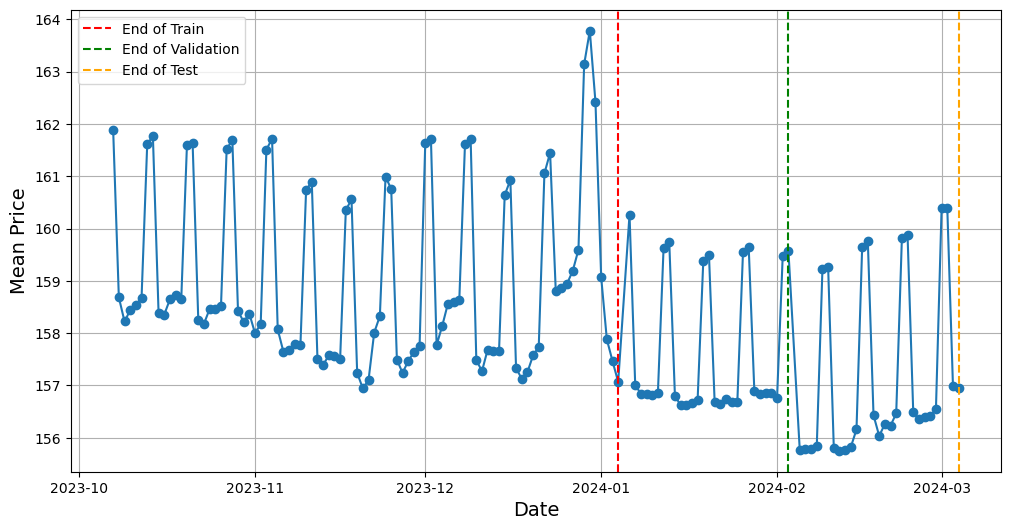

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'date' column is in datetime format
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Group by date and calculate the mean price
mean_price_over_time = combined_data.groupby('date')['price'].mean()

# Ensure the 'date' column in the train, validation, and test datasets are in datetime format
train_data_ny['date'] = pd.to_datetime(train_data_ny['date'])
valid_data_ny['date'] = pd.to_datetime(valid_data_ny['date'])
test_data_ny['date'] = pd.to_datetime(test_data_ny['date'])

# Determine the end dates of the train, validation, and test datasets
end_date_train = train_data_ny['date'].max()
end_date_valid = valid_data_ny['date'].max()
end_date_test = test_data_ny['date'].max()

# Plot the mean price over time
plt.figure(figsize=(12, 6))
plt.plot(mean_price_over_time.index, mean_price_over_time.values, marker='o', linestyle='-')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean Price', fontsize=14)
plt.grid(True)

# Add vertical lines for the end dates of train, validation, and test datasets
plt.axvline(x=end_date_train, color='r', linestyle='--', label='End of Train')
plt.axvline(x=end_date_valid, color='g', linestyle='--', label='End of Validation')
plt.axvline(x=end_date_test, color='orange', linestyle='--', label='End of Test')

# Add legend to explain the vertical lines
plt.legend()

plt.show()

In [5]:
# Assuming the necessary imports have been done
# import pandas as pd

# 1. Extract Date and Price Columns
date_price_data = combined_data[['date', 'price']]

# 2. Convert Date to Day of the Week
date_price_data['day_of_week'] = pd.to_datetime(date_price_data['date']).dt.day_name()

# 3. Group By Day of the Week and 4. Calculate Mean Price
average_price_per_day = date_price_data.groupby('day_of_week')['price'].mean().reset_index()

# 5. Output Results
print(average_price_per_day)

  day_of_week       price
0      Friday  161.052702
1      Monday  157.621520
2    Saturday  161.238836
3      Sunday  158.016570
4    Thursday  157.878539
5     Tuesday  157.734731
6   Wednesday  157.807499


C:\Users\anton\AppData\Local\Temp\ipykernel_12240\38797166.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_price_data['day_of_week'] = pd.to_datetime(date_price_data['date']).dt.day_name()


In [6]:
# Count the unique IDs in the combined dataset
unique_ids_count = combined_data['id'].nunique()

# Display the count of unique IDs
print(f"Number of unique IDs in the combined dataset: {unique_ids_count}")

Number of unique IDs in the combined dataset: 23578


In [7]:
import pandas as pd

# Assuming the combined_data dataframe is already loaded
# combined_data = pd.read_csv('path_to_combined_data.csv')

# Extract the column names and store them in a set
column_names = list(combined_data.columns)

# Print the set of column names
print(column_names)

['id', 'date', 'available', 'price', 'season_Autumn', 'is_holiday', 'is_school_holiday', 'host_id', 'host_response_time', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_identity_verified', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'reviews_per_month', 'Microwave', 'Dining table', 'Lock on bedroom door', 'Baking sheet', 'tv', 'Bed linens', 'soap', 'view', 'clothing storage', 'wifi', 'Kitchen', 'bbq', 'Self check-in', 'Washer', 'shampoo', 'Hot water', 'Lockbox', 'Security cameras on property', 'Freezer', 'Laundromat nearby', 'Cleaning products', 'conditioner', 'gym', 'Pets allowed', 'Luggage dropoff allowed', 'pool', 'stove', 'game console', 'Pri

In [8]:
import pandas as pd

# Assuming the combined_data dataframe is already loaded
# combined_data = pd.read_csv('path_to_combined_data.csv')

# Count the number of columns starting with 'neighbourhood'
neighbourhood_columns = [col for col in combined_data.columns if col.startswith('neighbourhood')]
count_neighbourhood_columns = len(neighbourhood_columns)

# Print the result
print(f"Number of columns starting with 'neighbourhood': {count_neighbourhood_columns}")

Number of columns starting with 'neighbourhood': 31


In [9]:
import pandas as pd

# Assuming the dataset is already loaded into a DataFrame named 'df'
# Ensure the 'date' column is in datetime format
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Get the first and last date
first_date = combined_data['date'].min()
last_date = combined_data['date'].max()

print(f"First date in the dataset: {first_date}")
print(f"Last date in the dataset: {last_date}")

First date in the dataset: 2023-10-07 00:00:00
Last date in the dataset: 2024-03-04 00:00:00


In [10]:
import pandas as pd


# Count the unique IDs in each dataset
train_unique_ids_count = train_data_ny['id'].nunique()
valid_unique_ids_count = valid_data_ny['id'].nunique()
test_unique_ids_count = test_data_ny['id'].nunique()

# Display the count of unique IDs
print(f"Number of unique IDs in the training dataset: {train_unique_ids_count}")
print(f"Number of unique IDs in the validation dataset: {valid_unique_ids_count}")
print(f"Number of unique IDs in the test dataset: {test_unique_ids_count}")

Number of unique IDs in the training dataset: 14154
Number of unique IDs in the validation dataset: 4694
Number of unique IDs in the test dataset: 4730


In [11]:
import pandas as pd

# Ensure the 'date' column is in datetime format for each dataset
train_data_ny['date'] = pd.to_datetime(train_data_ny['date'])
valid_data_ny['date'] = pd.to_datetime(valid_data_ny['date'])
test_data_ny['date'] = pd.to_datetime(test_data_ny['date'])

# Get the first and last date for each dataset
train_first_date = train_data_ny['date'].min()
train_last_date = train_data_ny['date'].max()

valid_first_date = valid_data_ny['date'].min()
valid_last_date = valid_data_ny['date'].max()

test_first_date = test_data_ny['date'].min()
test_last_date = test_data_ny['date'].max()

# Display the first and last date for each dataset
print(f"First date in the training dataset: {train_first_date}")
print(f"Last date in the training dataset: {train_last_date}")

print(f"First date in the validation dataset: {valid_first_date}")
print(f"Last date in the validation dataset: {valid_last_date}")

print(f"First date in the test dataset: {test_first_date}")
print(f"Last date in the test dataset: {test_last_date}")

First date in the training dataset: 2023-10-07 00:00:00
Last date in the training dataset: 2024-01-04 00:00:00
First date in the validation dataset: 2024-01-06 00:00:00
Last date in the validation dataset: 2024-02-03 00:00:00
First date in the test dataset: 2024-02-05 00:00:00
Last date in the test dataset: 2024-03-04 00:00:00


# Engineering dataset for baseline models

In [12]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Extract unique IDs from each dataset
unique_train_ids = train_data_ny['id'].unique()
unique_valid_ids = valid_data_ny['id'].unique()
unique_test_ids = test_data_ny['id'].unique()

# Randomly select 6000 unique IDs for training, 2000 for validation, and 2000 for testing
selected_train_ids = np.random.choice(unique_train_ids, 6000, replace=False)
selected_valid_ids = np.random.choice(unique_valid_ids, 2000, replace=False)
selected_test_ids = np.random.choice(unique_test_ids, 2000, replace=False)

# Ensure IDs are exclusive to each dataset
selected_train_ids = set(selected_train_ids)
selected_valid_ids = set(selected_valid_ids)
selected_test_ids = set(selected_test_ids)

# Filter datasets based on the selected unique IDs
train_data_ny_filtered = train_data_ny[train_data_ny['id'].isin(selected_train_ids)]
valid_data_ny_filtered = valid_data_ny[valid_data_ny['id'].isin(selected_valid_ids)]
test_data_ny_filtered = test_data_ny[test_data_ny['id'].isin(selected_test_ids)]

# Check the amount of unique IDs in the filtered datasets
train_unique_count = len(train_data_ny_filtered['id'].unique())
valid_unique_count = len(valid_data_ny_filtered['id'].unique())
test_unique_count = len(test_data_ny_filtered['id'].unique())

# Display the result
print("Filtered Train Data Info:")
print(train_data_ny_filtered.info())
print(f"Number of unique IDs in filtered train data: {train_unique_count}")

print("\nFiltered Validation Data Info:")
print(valid_data_ny_filtered.info())
print(f"Number of unique IDs in filtered validation data: {valid_unique_count}")

print("\nFiltered Test Data Info:")
print(test_data_ny_filtered.info())
print(f"Number of unique IDs in filtered test data: {test_unique_count}")

Filtered Train Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 539725 entries, 0 to 1273395
Columns: 138 entries, id to kitchen_amenities
dtypes: bool(107), datetime64[ns](1), float64(10), int64(20)
memory usage: 186.8 MB
None
Number of unique IDs in filtered train data: 6000

Filtered Validation Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 57933 entries, 1 to 136057
Columns: 138 entries, id to kitchen_amenities
dtypes: bool(107), datetime64[ns](1), float64(10), int64(20)
memory usage: 20.1 MB
None
Number of unique IDs in filtered validation data: 2000

Filtered Test Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 57972 entries, 2 to 137061
Columns: 138 entries, id to kitchen_amenities
dtypes: bool(107), datetime64[ns](1), float64(10), int64(20)
memory usage: 20.1 MB
None
Number of unique IDs in filtered test data: 2000


In [13]:
import pandas as pd


# Function to count the number of unique days and get the start and end dates in the dataset
def analyze_dates(data):
    unique_days = data['date'].nunique()
    start_date = data['date'].min()
    end_date = data['date'].max()
    return unique_days, start_date, end_date

# Analyze the dates in each dataset
train_unique_days, train_start_date, train_end_date = analyze_dates(train_data_ny_filtered)
valid_unique_days, valid_start_date, valid_end_date = analyze_dates(valid_data_ny_filtered)
test_unique_days, test_start_date, test_end_date = analyze_dates(test_data_ny_filtered)

# Check for overlapping IDs
train_ids = set(train_data_ny_filtered['id'])
valid_ids = set(valid_data_ny_filtered['id'])
test_ids = set(test_data_ny_filtered['id'])

no_overlap_train_valid = train_ids.isdisjoint(valid_ids)
no_overlap_train_test = train_ids.isdisjoint(test_ids)
no_overlap_valid_test = valid_ids.isdisjoint(test_ids)

# Display the results
print(f"Train Data: Unique days: {train_unique_days}, Start date: {train_start_date}, End date: {train_end_date}")
print(f"Validation Data: Unique days: {valid_unique_days}, Start date: {valid_start_date}, End date: {valid_end_date}")
print(f"Test Data: Unique days: {test_unique_days}, Start date: {test_start_date}, End date: {test_end_date}")

print(f"\nNo overlapping IDs between train and validation sets: {no_overlap_train_valid}")
print(f"No overlapping IDs between train and test sets: {no_overlap_train_test}")
print(f"No overlapping IDs between validation and test sets: {no_overlap_valid_test}")

Train Data: Unique days: 90, Start date: 2023-10-07 00:00:00, End date: 2024-01-04 00:00:00
Validation Data: Unique days: 29, Start date: 2024-01-06 00:00:00, End date: 2024-02-03 00:00:00
Test Data: Unique days: 29, Start date: 2024-02-05 00:00:00, End date: 2024-03-04 00:00:00

No overlapping IDs between train and validation sets: True
No overlapping IDs between train and test sets: True
No overlapping IDs between validation and test sets: True


#### Data ready for LSTM model

In [ ]:
train_data_ny_filtered.to_csv('Train_model_NY_Vince.csv', index=False)
valid_data_ny_filtered.to_csv('Valid_model_NY_Vince.csv', index=False)
test_data_ny_filtered.to_csv('Test_model_NY_Vince.csv', index=False)

#### Reading in data with and without LSTM features

In [14]:
import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/Train_model_NY_Vince.csv'
#read data, and quickly check if it is correctly read in
train_data_ny_filtered= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/Valid_model_NY_Vince.csv'
#read data, and quickly check if it is correctly read in
valid_data_ny_filtered= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/Test_model_NY_Vince.csv'
#read data, and quickly check if it is correctly read in
test_data_ny_filtered= pd.read_csv(file_path)

In [15]:
import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/ny met lstm/train_data_lstm_ny_FINAL.csv'
#read data, and quickly check if it is correctly read in
train_data_lstm_ny= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/ny met lstm/val_data_lstm_ny_FINAL.csv'
#read data, and quickly check if it is correctly read in
valid_data_lstm_ny= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/ny met lstm/test_data_lstm_ny_FINAL.csv'
#read data, and quickly check if it is correctly read in
test_data_lstm_ny= pd.read_csv(file_path)

In [18]:
train_data_lstm_ny['price'].describe()

count    6000.000000
mean      156.696000
std       131.618152
min        10.000000
25%        79.000000
50%       120.000000
75%       195.000000
max      1400.000000
Name: price, dtype: float64

In [17]:
# Step 1: Group the data by 'id'
grouped = train_data_ny_filtered.groupby('id')

# Step 2: Calculate the standard deviation of 'price' for each 'id'
std_per_id = grouped['price'].std()

# Step 3: Calculate the average of these standard deviations
average_std = std_per_id.mean()

print(f"The average standard deviation of price per ID is: {average_std}")

The average standard deviation of price per ID is: 4.323226689985069


#### Selecting last days without the LSTM features

In [19]:
import pandas as pd

# Function to select the last day for each ID in the given dataframe
def select_last_day_per_id(data):
    data = data.sort_values(by=['id', 'date'])
    last_day_data = data.groupby('id').tail(1)
    return last_day_data

# Apply the function to each split
train_data_ny_last_day = select_last_day_per_id(train_data_ny_filtered)
valid_data_ny_last_day = select_last_day_per_id(valid_data_ny_filtered)
test_data_ny_last_day = select_last_day_per_id(test_data_ny_filtered)

# Calculate the total unique IDs across all splits
total_unique_ids = set(train_data_ny_filtered['id']).union(valid_data_ny_filtered['id']).union(test_data_ny_filtered['id'])
total_unique_count = len(total_unique_ids)

# Calculate the percentage of unique IDs in each split based on the total unique IDs
train_unique_count = len(set(train_data_ny_last_day['id']))
valid_unique_count = len(set(valid_data_ny_last_day['id']))
test_unique_count = len(set(test_data_ny_last_day['id']))

train_percentage = (train_unique_count / total_unique_count) * 100
valid_percentage = (valid_unique_count / total_unique_count) * 100
test_percentage = (test_unique_count / total_unique_count) * 100

print("\nPercentage of unique IDs per split:")
print(f"Train: {train_percentage:.2f}%")
print(f"Validation: {valid_percentage:.2f}%")
print(f"Test: {test_percentage:.2f}%")


Percentage of unique IDs per split:
Train: 60.00%
Validation: 20.00%
Test: 20.00%


In [20]:
import pandas as pd

# Function to get the first and last date in the dataset
def get_first_last_dates(data):
    first_date = data['date'].min()
    last_date = data['date'].max()
    return first_date, last_date

# Get the first and last date for each dataset
train_first_date, train_last_date = get_first_last_dates(train_data_ny_last_day)
valid_first_date, valid_last_date = get_first_last_dates(valid_data_ny_last_day)
test_first_date, test_last_date = get_first_last_dates(test_data_ny_last_day)

# Display the results
print(f"Train Data: First date: {train_first_date}, Last date: {train_last_date}")
print(f"Validation Data: First date: {valid_first_date}, Last date: {valid_last_date}")
print(f"Test Data: First date: {test_first_date}, Last date: {test_last_date}")

Train Data: First date: 2023-10-16, Last date: 2024-01-04
Validation Data: First date: 2024-01-15, Last date: 2024-02-03
Test Data: First date: 2024-02-17, Last date: 2024-03-04


In [21]:
train_data_ny_last_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 537346 to 533820
Columns: 138 entries, id to kitchen_amenities
dtypes: bool(107), float64(10), int64(20), object(1)
memory usage: 2.1+ MB


In [ ]:
train_data_ny_last_day.to_csv('Baslinemodels_train_ny.csv', index=False)
valid_data_ny_last_day.to_csv('Baslinemodels_valid_ny.csv', index=False)
test_data_ny_last_day.to_csv('Baslinemodels_test_ny.csv', index=False)

#### With the LSTM features

In [22]:
# Extracting unique IDs from each dataset
train_ids = set(train_data_lstm_ny['id'])
valid_ids = set(valid_data_lstm_ny['id'])
test_ids = set(test_data_lstm_ny['id'])

# Check for overlapping IDs between the datasets
train_valid_overlap = train_ids.intersection(valid_ids)
train_test_overlap = train_ids.intersection(test_ids)
valid_test_overlap = valid_ids.intersection(test_ids)

# Print the results
print(f"Overlapping IDs between train and validation sets: {train_valid_overlap}")
print(f"Number of overlapping IDs between train and validation sets: {len(train_valid_overlap)}\n")

print(f"Overlapping IDs between train and test sets: {train_test_overlap}")
print(f"Number of overlapping IDs between train and test sets: {len(train_test_overlap)}\n")

print(f"Overlapping IDs between validation and test sets: {valid_test_overlap}")
print(f"Number of overlapping IDs between validation and test sets: {len(valid_test_overlap)}\n")

Overlapping IDs between train and validation sets: set()
Number of overlapping IDs between train and validation sets: 0

Overlapping IDs between train and test sets: set()
Number of overlapping IDs between train and test sets: 0

Overlapping IDs between validation and test sets: set()
Number of overlapping IDs between validation and test sets: 0



In [23]:
import pandas as pd

# Function to get the first and last date in the dataset
def get_first_last_dates(data):
    first_date = data['date'].min()
    last_date = data['date'].max()
    return first_date, last_date

# Get the first and last date for each dataset
train_first_date, train_last_date = get_first_last_dates(train_data_lstm_ny)
valid_first_date, valid_last_date = get_first_last_dates(valid_data_lstm_ny)
test_first_date, test_last_date = get_first_last_dates(test_data_lstm_ny)

# Display the results
print(f"Merged Train Data: First date: {train_first_date}, Last date: {train_last_date}")
print(f"Merged Validation Data: First date: {valid_first_date}, Last date: {valid_last_date}")
print(f"Merged Test Data: First date: {test_first_date}, Last date: {test_last_date}")

Merged Train Data: First date: 2023-10-16, Last date: 2024-01-04
Merged Validation Data: First date: 2024-01-15, Last date: 2024-02-03
Merged Test Data: First date: 2024-02-17, Last date: 2024-03-04


In [ ]:
train_data_lstm_ny.to_csv('Baslinemodels_train_lstm_ny.csv', index=False)
valid_data_lstm_ny.to_csv('Baslinemodels_valid_lstm_ny.csv', index=False)
test_data_lstm_ny.to_csv('Baslinemodels_test_lstm_ny.csv', index=False)

#### Check if original dataset and lstm dataset are identical except additional columns

In [24]:
import pandas as pd

# Assuming the dataframes are already loaded

# Get the list of columns to compare, excluding the last 16 columns from train_data_lstm_ny
columns_to_compare = train_data_lstm_ny.columns[:-16]

# Extract the relevant columns from train_data_lstm_ny
trimmed_train_data_lstm_ny = train_data_lstm_ny[columns_to_compare]

# Align dataframes to ensure they have the same order of columns and index
trimmed_train_data_lstm_ny = trimmed_train_data_lstm_ny.reset_index(drop=True)
train_data_ny_last_day = train_data_ny_last_day[columns_to_compare].reset_index(drop=True)

# Compare the dataframes
differences = trimmed_train_data_lstm_ny != train_data_ny_last_day

# Find the indices and columns where differences occur
diff_indices = differences[differences].stack().index.tolist()

if not diff_indices:
    print("The data in train_data_lstm_ny (excluding the last 16 columns) is identical to train_data_ny_last_day.")
else:
    print("Differences found:")
    for index, column in diff_indices:
        lstm_value = trimmed_train_data_lstm_ny.loc[index, column]
        last_day_value = train_data_ny_last_day.loc[index, column]
        print(f"Row {index}, Column '{column}': train_data_lstm_ny = {lstm_value}, train_data_ny_last_day = {last_day_value}")

The data in train_data_lstm_ny (excluding the last 16 columns) is identical to train_data_ny_last_day.


# Baseline models

In [25]:
#WITHOUT LSTM
import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/Baslinemodels_train_ny.csv'
#read data, and quickly check if it is correctly read in
train_data_ny= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/Baslinemodels_valid_ny.csv'
#read data, and quickly check if it is correctly read in
valid_data_ny= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/Baslinemodels_test_ny.csv'
#read data, and quickly check if it is correctly read in
test_data_ny= pd.read_csv(file_path)

In [26]:
#WITH LSTM
import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/Baslinemodels_train_lstm_ny.csv'
#read data, and quickly check if it is correctly read in
train_data_lstm_ny= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/Baslinemodels_valid_lstm_ny.csv'
#read data, and quickly check if it is correctly read in
valid_data_lstm_ny= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/Baslinemodels_test_lstm_ny.csv'
#read data, and quickly check if it is correctly read in
test_data_lstm_ny= pd.read_csv(file_path)

In [27]:
train_data_lstm_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 154 entries, id to 15
dtypes: bool(107), float64(26), int64(20), object(1)
memory usage: 2.8+ MB


In [30]:
import pandas as pd

# Extract IDs from each dataset
train_ids = set(train_data_lstm_ny['id'])
valid_ids = set(valid_data_lstm_ny['id'])
test_ids = set(test_data_lstm_ny['id'])

# Check for overlapping IDs between the datasets
overlap_train_valid = train_ids.intersection(valid_ids)
overlap_train_test = train_ids.intersection(test_ids)
overlap_valid_test = valid_ids.intersection(test_ids)

# Output the results
if not overlap_train_valid and not overlap_train_test and not overlap_valid_test:
    print("IDs are unique across the train, validation, and test datasets.")
else:
    print("There are overlapping IDs between the datasets.")
    if overlap_train_valid:
        print(f"Overlapping IDs between train and validation datasets: {overlap_train_valid}")
    if overlap_train_test:
        print(f"Overlapping IDs between train and test datasets: {overlap_train_test}")
    if overlap_valid_test:
        print(f"Overlapping IDs between validation and test datasets: {overlap_valid_test}")

IDs are unique across the train, validation, and test datasets.


In [31]:
# Print a list of all columns in the dataset
columns_list = train_data_lstm_ny.columns.tolist()
print("List of all columns in the dataset:")
print(columns_list)

List of all columns in the dataset:
['id', 'date', 'available', 'price', 'season_Autumn', 'is_holiday', 'is_school_holiday', 'host_id', 'host_response_time', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_identity_verified', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'reviews_per_month', 'Microwave', 'Dining table', 'Lock on bedroom door', 'Baking sheet', 'tv', 'Bed linens', 'soap', 'view', 'clothing storage', 'wifi', 'Kitchen', 'bbq', 'Self check-in', 'Washer', 'shampoo', 'Hot water', 'Lockbox', 'Security cameras on property', 'Freezer', 'Laundromat nearby', 'Cleaning products', 'conditioner', 'gym', 'Pets allowed', 'Luggage dropoff allowed', '

In [32]:
import pandas as pd

# Ensure the 'date' column is in datetime format for each dataset
train_data_lstm_ny['date'] = pd.to_datetime(train_data_lstm_ny['date'])
valid_data_lstm_ny['date'] = pd.to_datetime(valid_data_lstm_ny['date'])
test_data_lstm_ny['date'] = pd.to_datetime(test_data_lstm_ny['date'])

# Get the first and last date for each dataset
train_lstm_first_date = train_data_lstm_ny['date'].min()
train_lstm_last_date = train_data_lstm_ny['date'].max()

valid_lstm_first_date = valid_data_lstm_ny['date'].min()
valid_lstm_last_date = valid_data_lstm_ny['date'].max()

test_lstm_first_date = test_data_lstm_ny['date'].min()
test_lstm_last_date = test_data_lstm_ny['date'].max()

# Display the first and last date for each dataset
print(f"First date in the LSTM training dataset (ny): {train_lstm_first_date}")
print(f"Last date in the LSTM training dataset (ny): {train_lstm_last_date}")

print(f"First date in the LSTM validation dataset (ny): {valid_lstm_first_date}")
print(f"Last date in the LSTM validation dataset (ny): {valid_lstm_last_date}")

print(f"First date in the LSTM test dataset (ny): {test_lstm_first_date}")
print(f"Last date in the LSTM test dataset (ny): {test_lstm_last_date}")

First date in the LSTM training dataset (ny): 2023-12-30 00:00:00
Last date in the LSTM training dataset (ny): 2024-01-04 00:00:00
First date in the LSTM validation dataset (ny): 2024-01-15 00:00:00
Last date in the LSTM validation dataset (ny): 2024-02-03 00:00:00
First date in the LSTM test dataset (ny): 2024-03-04 00:00:00
Last date in the LSTM test dataset (ny): 2024-03-04 00:00:00


In [33]:
import pandas as pd

# Ensure the 'date' column is in datetime format for each dataset
train_data_ny['date'] = pd.to_datetime(train_data_ny['date'])
valid_data_ny['date'] = pd.to_datetime(valid_data_ny['date'])
test_data_ny['date'] = pd.to_datetime(test_data_ny['date'])

# Get the first and last date for each dataset
train_ny_first_date = train_data_ny['date'].min()
train_ny_last_date = train_data_ny['date'].max()

valid_ny_first_date = valid_data_ny['date'].min()
valid_ny_last_date = valid_data_ny['date'].max()

test_ny_first_date = test_data_ny['date'].min()
test_ny_last_date = test_data_ny['date'].max()

# Display the first and last date for each dataset
print(f"First date in the training dataset (ny): {train_ny_first_date}")
print(f"Last date in the training dataset (ny): {train_ny_last_date}")

print(f"First date in the validation dataset (ny): {valid_ny_first_date}")
print(f"Last date in the validation dataset (ny): {valid_ny_last_date}")

print(f"First date in the test dataset (ny): {test_ny_first_date}")
print(f"Last date in the test dataset (ny): {test_ny_last_date}")

First date in the training dataset (ny): 2023-10-16 00:00:00
Last date in the training dataset (ny): 2024-01-04 00:00:00
First date in the validation dataset (ny): 2024-01-15 00:00:00
Last date in the validation dataset (ny): 2024-02-03 00:00:00
First date in the test dataset (ny): 2024-02-17 00:00:00
Last date in the test dataset (ny): 2024-03-04 00:00:00


In [34]:
import pandas as pd

# List of datasets to check
datasets = {
    "Train Data": train_data_lstm_ny,
    "Validation Data": valid_data_lstm_ny,
    "Test Data": test_data_lstm_ny
}

# Loop through each dataset and print the number of missing values per column
for dataset_name, dataset in datasets.items():
    print(f"\nMissing values in {dataset_name}:")
    missing_values_count = dataset.isnull().sum()
    print(missing_values_count[missing_values_count > 0])



Missing values in Train Data:
Series([], dtype: int64)

Missing values in Validation Data:
Series([], dtype: int64)

Missing values in Test Data:
Series([], dtype: int64)


## XGB

## Without LSTM

#### Hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm
import pickle

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_ny, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_ny, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_ny, 'price')

# Apply scaling to both features and target
X_train, y_train, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid, y_valid, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test, y_test, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Save the scaler
with open('scaler_without_LSTM.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the scaled datasets
scaled_train_df = pd.DataFrame(X_train, columns=X_train_raw.columns)
scaled_train_df['price'] = y_train
scaled_valid_df = pd.DataFrame(X_valid, columns=X_valid_raw.columns)
scaled_valid_df['price'] = y_valid
scaled_test_df = pd.DataFrame(X_test, columns=X_test_raw.columns)
scaled_test_df['price'] = y_test

scaled_train_df.to_csv('scaled_train_data_without_LSTM.csv', index=False)
scaled_valid_df.to_csv('scaled_valid_data_without_LSTM.csv', index=False)
scaled_test_df.to_csv('scaled_test_data_without_LSTM.csv', index=False)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10)
    }

    model = XGBRegressor(
        objective='reg:squarederror',
        eval_metric='rmse',
        **param
    )
    
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)
    preds = model.predict(X_valid)
    mse = mean_squared_error(y_valid, preds)
    rmse = np.sqrt(mse)
    return rmse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    **best_params
)

best_model.fit(X_train, y_train)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train)
y_valid_pred_scaled = best_model.predict(X_valid)
y_test_pred_scaled = best_model.predict(X_test)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with tuned hyperparameters:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'xgb_model_without_lstm_ny.joblib')

# Load the model
loaded_model = joblib.load('xgb_model_without_lstm_ny.joblib')

In [35]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_without_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_without_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_without_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_without_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('xgb_model_without_lstm_ny.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  38.73214694722493
Mean Squared Error (MSE):  4468.530688270231
R-squared (R2):  0.74200840407708

Validation Performance Metrics:
Mean Absolute Error (MAE):  52.42464029066903
Mean Squared Error (MSE):  7312.265462842409
R-squared (R2):  0.5575350603747389

Test Performance Metrics:
Mean Absolute Error (MAE):  48.00473933017103
Mean Squared Error (MSE):  8682.143292235995
R-squared (R2):  0.4856566766902214



## With LSTM

#### hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm
import pickle

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets for LSTM data
X_train_raw, y_train_raw = prepare_data(train_data_lstm_ny, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_lstm_ny, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_lstm_ny, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Save the scaler
with open('scaler_with_LSTM.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the scaled datasets
scaled_train_df = pd.DataFrame(X_train_scaled, columns=X_train_raw.columns)
scaled_train_df['price'] = y_train_scaled
scaled_valid_df = pd.DataFrame(X_valid_scaled, columns=X_valid_raw.columns)
scaled_valid_df['price'] = y_valid_scaled
scaled_test_df = pd.DataFrame(X_test_scaled, columns=X_test_raw.columns)
scaled_test_df['price'] = y_test_scaled

scaled_train_df.to_csv('scaled_train_data_with_LSTM.csv', index=False)
scaled_valid_df.to_csv('scaled_valid_data_with_LSTM.csv', index=False)
scaled_test_df.to_csv('scaled_test_data_with_LSTM.csv', index=False)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10)
    }

    model = XGBRegressor(
        objective='reg:squarederror',
        eval_metric='rmse',  # Use rmse for evaluation
        **param
    )
    
    model.fit(X_train_scaled, y_train_scaled, eval_set=[(X_valid_scaled, y_valid_scaled)], verbose=False)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    rmse = np.sqrt(mse)
    return rmse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',  # Use rmse for evaluation
    **best_params
)

best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with original scale:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'xgb_model_with_lstm_ny.joblib')

# Load the model
loaded_model = joblib.load('xgb_model_with_lstm_ny.joblib')

In [36]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_with_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_with_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_with_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_with_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('xgb_model_with_lstm_ny.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  5.127591896629524
Mean Squared Error (MSE):  341.08675550389194
R-squared (R2):  0.9800856640131741

Validation Performance Metrics:
Mean Absolute Error (MAE):  6.092627735968532
Mean Squared Error (MSE):  270.12032787671205
R-squared (R2):  0.9834687057943365

Test Performance Metrics:
Mean Absolute Error (MAE):  4.366786910340961
Mean Squared Error (MSE):  248.84717357988603
R-squared (R2):  0.9853872009625433



## RF

## Without LSTM

#### Hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping the unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_ny, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_ny, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_ny, 'price')

# Apply scaling to both features and target
X_train, y_train, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid, y_valid, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test, y_test, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 5, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 15),
        'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])
    }

    model = RandomForestRegressor(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = mean_squared_error(y_valid, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train)
y_valid_pred_scaled = best_model.predict(X_valid)
y_test_pred_scaled = best_model.predict(X_test)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with tuned hyperparameters:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'rf_model_without_lstm_ny.joblib')

# Load the model
loaded_model = joblib.load('rf_model_without_lstm_ny.joblib')

In [37]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_without_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_without_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_without_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_without_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('rf_model_without_lstm_ny.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  35.01453033703316
Mean Squared Error (MSE):  4500.724197135057
R-squared (R2):  0.7401497048066024

Validation Performance Metrics:
Mean Absolute Error (MAE):  53.644685991863284
Mean Squared Error (MSE):  7907.413478716831
R-squared (R2):  0.5215226737552836

Test Performance Metrics:
Mean Absolute Error (MAE):  50.80381218669727
Mean Squared Error (MSE):  9115.450748227593
R-squared (R2):  0.45998688647506514



## With LSTM

#### Hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping the unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_lstm_ny, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_lstm_ny, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_lstm_ny, 'price')

# Apply scaling to both features and target
X_train, y_train, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid, y_valid, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test, y_test, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 5, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 15),
        'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])
    }

    model = RandomForestRegressor(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = mean_squared_error(y_valid, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train)
y_valid_pred_scaled = best_model.predict(X_valid)
y_test_pred_scaled = best_model.predict(X_test)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with tuned hyperparameters:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'rf_model_with_lstm_ny.joblib')

# Load the model
loaded_model = joblib.load('rf_model_with_lstm_ny.joblib')

In [38]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_with_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_with_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_with_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_with_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('rf_model_with_lstm_ny.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  5.374621437510919
Mean Squared Error (MSE):  897.6895835463597
R-squared (R2):  0.9475884311244912

Validation Performance Metrics:
Mean Absolute Error (MAE):  6.2709091135275115
Mean Squared Error (MSE):  262.5412861245818
R-squared (R2):  0.9839325411894226

Test Performance Metrics:
Mean Absolute Error (MAE):  3.2689681080965314
Mean Squared Error (MSE):  259.09348916641113
R-squared (R2):  0.9847855170117622



## Linear Regression

## Without LSTM

#### Hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping the unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_ny, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_ny, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_ny, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])

    model = LinearRegression(fit_intercept=fit_intercept)
    model.fit(X_train_scaled, y_train_scaled)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = LinearRegression(**best_params)
best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with tuned hyperparameters:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'linear_model_without_lstm_ny.joblib')

# Load the model
loaded_model = joblib.load('linear_model_without_lstm_ny.joblib')

In [39]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_without_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_without_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_without_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_without_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('linear_model_without_lstm_ny.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  55.56421339299665
Mean Squared Error (MSE):  8927.433949726212
R-squared (R2):  0.48457264974543723

Validation Performance Metrics:
Mean Absolute Error (MAE):  115818098431.40051
Mean Squared Error (MSE):  1.3422222090532802e+22
R-squared (R2):  -8.121782116777664e+17

Test Performance Metrics:
Mean Absolute Error (MAE):  115202742621.21295
Mean Squared Error (MSE):  1.3271671907449435e+22
R-squared (R2):  -7.862339522614071e+17



## With LSTM

#### hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets for LSTM data
X_train_raw, y_train_raw = prepare_data(train_data_lstm_ny, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_lstm_ny, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_lstm_ny, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    # No hyperparameters to tune for Linear Regression, just using it to follow the structure
    model = LinearRegression()
    model.fit(X_train_scaled, y_train_scaled)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Since there are no hyperparameters to tune, we use a default Linear Regression model
best_model = LinearRegression()
best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'linear_model_with_lstm_ny.joblib')

# Load the model
loaded_model = joblib.load('linear_model_with_lstm_ny.joblib')

In [40]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_with_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_with_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_with_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_with_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('linear_model_with_lstm_ny.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  10.729194602953589
Mean Squared Error (MSE):  883.0380250180838
R-squared (R2):  0.9484438617577671

Validation Performance Metrics:
Mean Absolute Error (MAE):  951768739650.0237
Mean Squared Error (MSE):  9.060123247950544e+23
R-squared (R2):  -5.544771995827068e+19

Test Performance Metrics:
Mean Absolute Error (MAE):  953373813547.3213
Mean Squared Error (MSE):  9.089216283577626e+23
R-squared (R2):  -5.33736787318826e+19



## Ridge Regression

## Without LSTM

#### Hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_ny, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_ny, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_ny, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    alpha = trial.suggest_float('alpha', 0.1, 10.0, log=True)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])

    model = Ridge(alpha=alpha, fit_intercept=fit_intercept)
    model.fit(X_train_scaled, y_train_scaled)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = Ridge(**best_params)
best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with tuned hyperparameters:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'ridge_model_without_lstm_ny.joblib')

# Load the model
loaded_model = joblib.load('ridge_model_without_lstm_ny.joblib')

In [41]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_without_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_without_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_without_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_without_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('ridge_model_without_lstm_ny.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  55.474148873665264
Mean Squared Error (MSE):  8937.535266718773
R-squared (R2):  0.4839894480011424

Validation Performance Metrics:
Mean Absolute Error (MAE):  63.03796191631607
Mean Squared Error (MSE):  9546.215636923389
R-squared (R2):  0.4223588097416886

Test Performance Metrics:
Mean Absolute Error (MAE):  57.261427309747745
Mean Squared Error (MSE):  10009.140893568543
R-squared (R2):  0.40704332819782285



## With LSTM

#### hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_lstm_ny, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_lstm_ny, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_lstm_ny, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'alpha': trial.suggest_float('alpha', 0.1, 10.0, log=True)
    }

    model = Ridge(**param)
    model.fit(X_train_scaled, y_train_scaled)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters and train the final model
best_params = study.best_params
best_model = Ridge(**best_params)
best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'ridge_model_with_lstm_ny.joblib')

# Load the model
loaded_model = joblib.load('ridge_model_with_lstm_ny.joblib')

In [42]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_with_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_with_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_with_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_with_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('ridge_model_with_lstm_ny.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  10.801772045017106
Mean Squared Error (MSE):  898.841588322761
R-squared (R2):  0.9475211713736932

Validation Performance Metrics:
Mean Absolute Error (MAE):  9.837029728160942
Mean Squared Error (MSE):  563.3761525236743
R-squared (R2):  0.9655215251697963

Test Performance Metrics:
Mean Absolute Error (MAE):  8.516263597295012
Mean Squared Error (MSE):  519.5894322759993
R-squared (R2):  0.9694886791495023



## Lasso Regression

## Without LSTM

#### Hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_ny, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_ny, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_ny, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'alpha': trial.suggest_float('alpha', 0.0001, 1.0, log=True)
    }

    model = Lasso(**param)
    model.fit(X_train_scaled, y_train_scaled)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = Lasso(**best_params)
best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with tuned hyperparameters:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'lasso_model_without_lstm_ny.joblib')

# Load the model
loaded_model = joblib.load('lasso_model_without_lstm_ny.joblib')

In [43]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_without_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_without_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_without_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_without_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('lasso_model_without_lstm_ny.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  55.32891005442633
Mean Squared Error (MSE):  8966.722501544507
R-squared (R2):  0.4823043166193586

Validation Performance Metrics:
Mean Absolute Error (MAE):  61.324970196366166
Mean Squared Error (MSE):  9350.743798848127
R-squared (R2):  0.4341868041535313

Test Performance Metrics:
Mean Absolute Error (MAE):  55.623424381232
Mean Squared Error (MSE):  9938.894486236479
R-squared (R2):  0.4112048318014384



## With LSTM

#### hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_lstm_ny, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_lstm_ny, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_lstm_ny, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'alpha': trial.suggest_float('alpha', 0.0001, 1.0, log=True)
    }

    model = Lasso(**param)
    model.fit(X_train_scaled, y_train_scaled)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters and train the final model
best_params = study.best_params
best_model = Lasso(**best_params)
best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'lasso_model_with_lstm_ny.joblib')

# Load the model
loaded_model = joblib.load('lasso_model_with_lstm_ny.joblib')

In [44]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_with_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_with_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_with_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_with_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('lasso_model_with_lstm_ny.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  12.201640840243302
Mean Squared Error (MSE):  1227.5244783843418
R-squared (R2):  0.9283310345531135

Validation Performance Metrics:
Mean Absolute Error (MAE):  7.877283698640901
Mean Squared Error (MSE):  225.67809123301546
R-squared (R2):  0.9861885591829715

Test Performance Metrics:
Mean Absolute Error (MAE):  7.284006400714289
Mean Squared Error (MSE):  174.6294146280485
R-squared (R2):  0.9897454148050865

